In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('used_cars.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [4]:
data.drop(['S.No.'], axis = 1, inplace = True)

In [5]:
from datetime import date
data['Car Age'] = date.today().year - data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Car Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10


In [6]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Brand', 'Model', 'Name']]

,Brand,Model,Name
0,Maruti,WagonR,Maruti Wagon R LXI CNG
1,Hyundai,Creta1.6,Hyundai Creta 1.6 CRDi SX Option
2,Honda,JazzV,Honda Jazz V
3,Maruti,ErtigaVDI,Maruti Ertiga VDI
4,Audi,A4New,Audi A4 New 2.0 TDI Multitronic
...,...,...,...
7248,Volkswagen,VentoDiesel,Volkswagen Vento Diesel Trendline
7249,Volkswagen,PoloGT,Volkswagen Polo GT TSI
7250,Nissan,MicraDiesel,Nissan Micra Diesel XV
7251,Volkswagen,PoloGT,Volkswagen Polo GT TSI


In [7]:
#check unique car manufacturers
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [8]:
#replace brand errors
data.Brand.replace({'Land': 'Land Rover', 'Mini': 'Mini Cooper', 'ISUZU': 'Isuzu'}, inplace = True)

In [9]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


In [10]:
data.sort_values(by = ['Kilometers_Driven'], ascending = False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Car Age,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00,6,BMW,X5xDrive
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50,10,Skoda,OctaviaAmbition
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90,10,Volkswagen,VentoDiesel
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70,14,Hyundai,i10Magna
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00,8,Volkswagen,Jetta2013-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19,1197.0,81.86,5.0,10.25,8.60,4,Hyundai,i20Active
1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49,2179.0,138.03,5.0,NaN,7.50,6,Tata,XenonXT
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.60,1999.0,177.00,5.0,52.77,40.00,5,Jaguar,XE2.0L
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,6.80,6.25,4,Maruti,WagonR


In [11]:
data.drop(index = 2328, inplace = True)

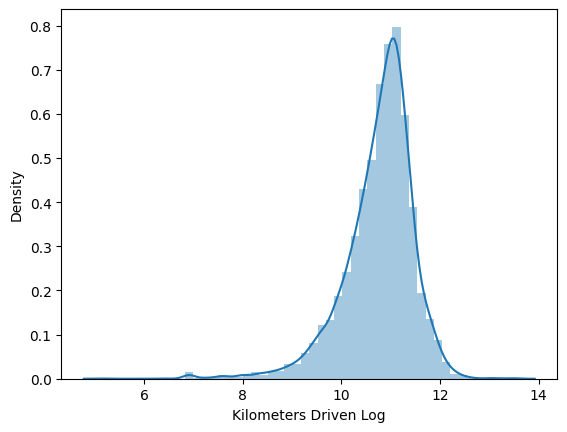

In [12]:
sns.distplot(np.log(data['Kilometers_Driven']), axlabel = 'Kilometers Driven Log');

In [13]:
data['kilometers_driven_log'] = np.log(data['Kilometers_Driven'])

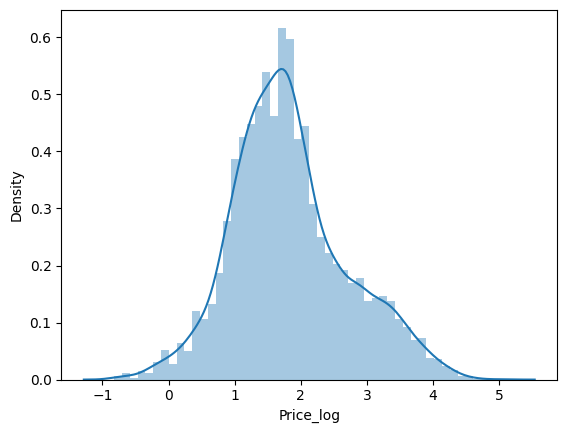

In [14]:
sns.distplot(np.log(data.Price), axlabel = 'Price_log');

In [15]:
data['price_log'] = np.log(data['Price'])

In [16]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
Car Age                     0
Brand                       0
Model                       1
kilometers_driven_log       0
price_log                1234
dtype: int64

In [17]:
cat_cols = data.select_dtypes(include = ['object']).columns
num_cols = data.select_dtypes(include = np.number).columns.tolist()
print('Categorical Variables : ', cat_cols)
print('Numerical Variables : ', num_cols)

Categorical Variables :  Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables :  ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price', 'Car Age', 'kilometers_driven_log', 'price_log']


Year
Skew : -0.84


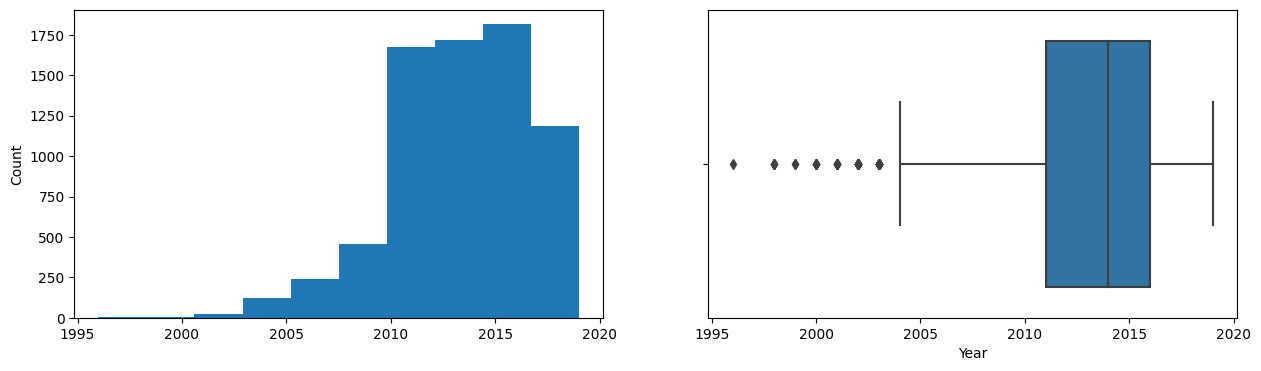

Kilometers_Driven
Skew : 3.83


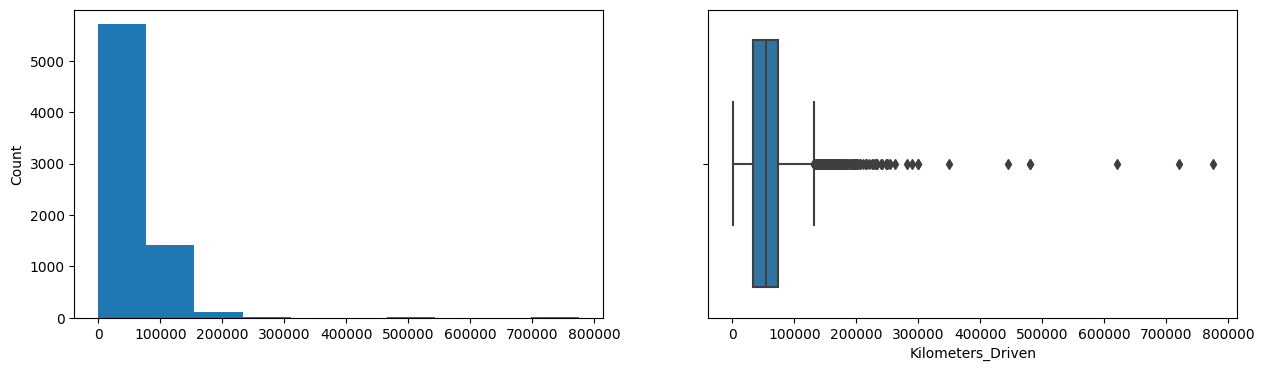

Mileage
Skew : -0.44


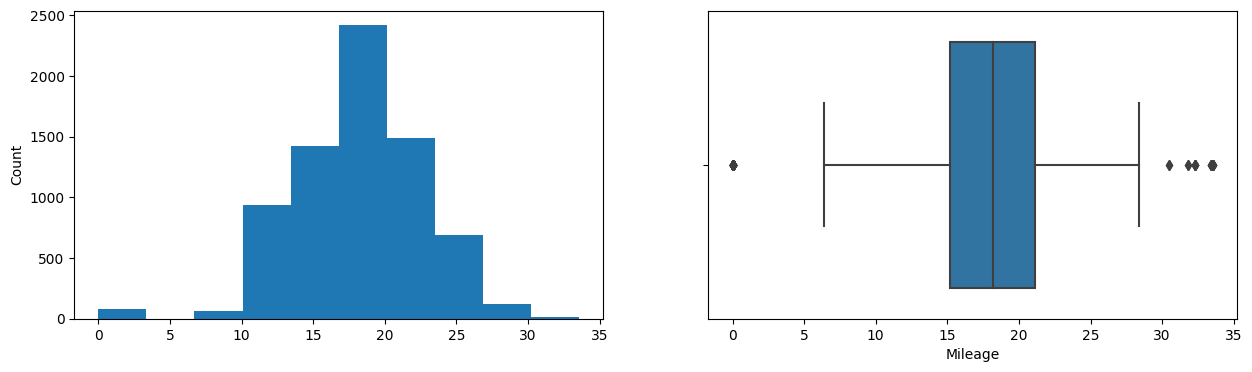

Engine
Skew : 1.41


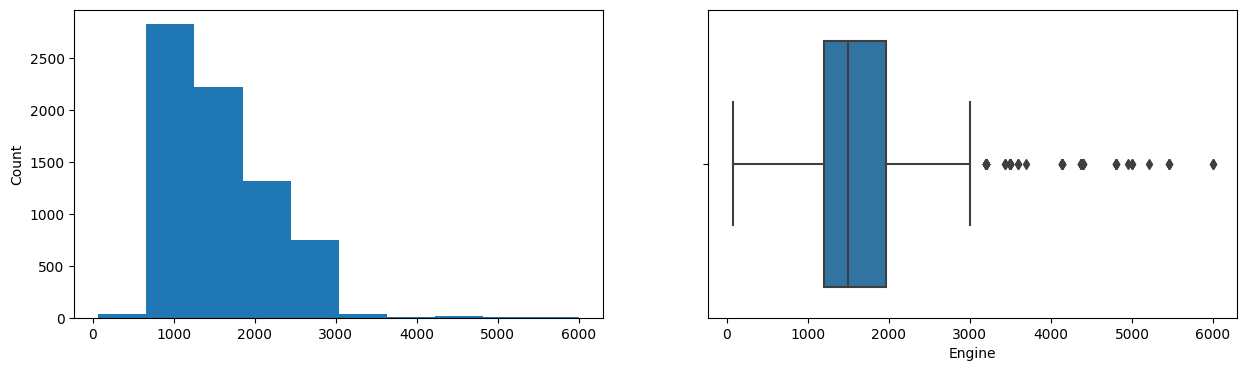

Power
Skew : 1.96


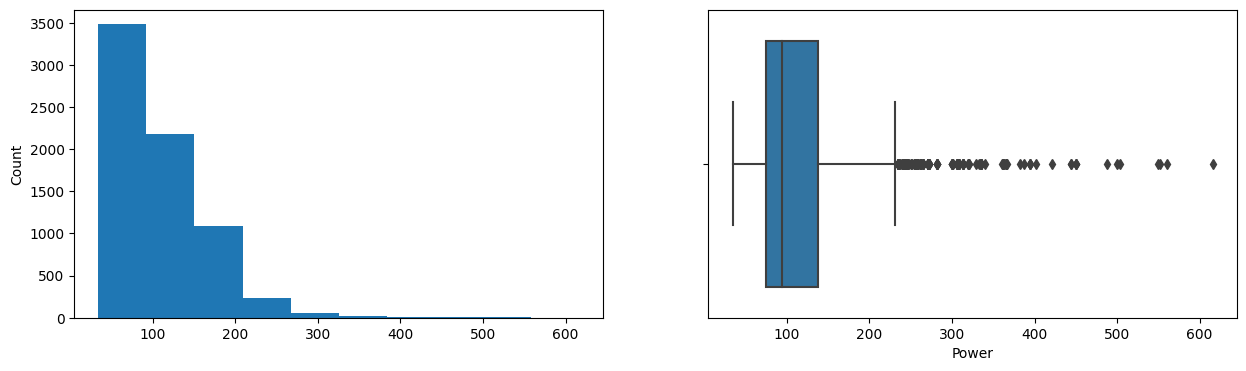

Seats
Skew : 1.95


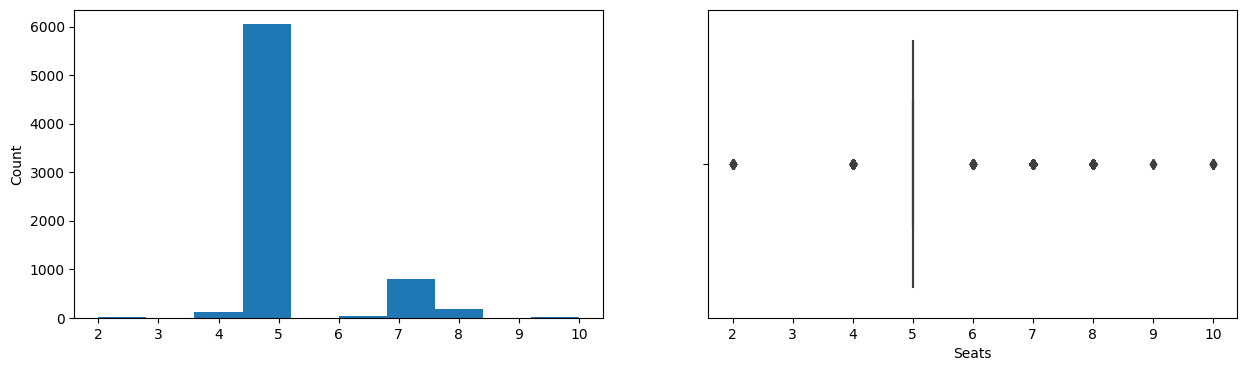

New_price
Skew : 4.13


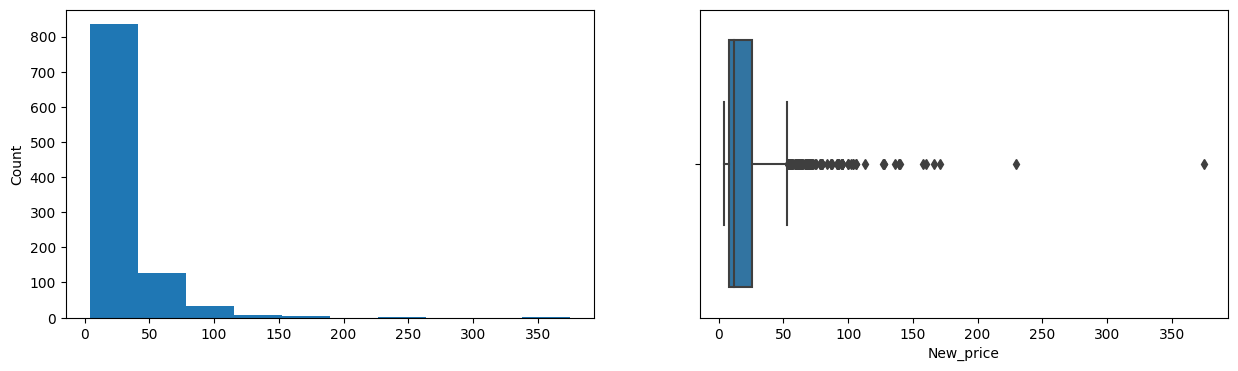

Price
Skew : 3.34


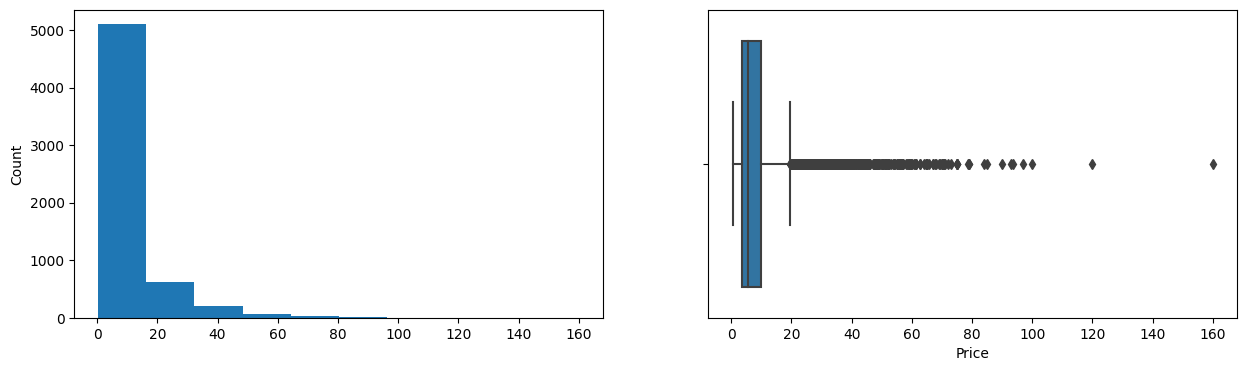

Car Age
Skew : 0.84


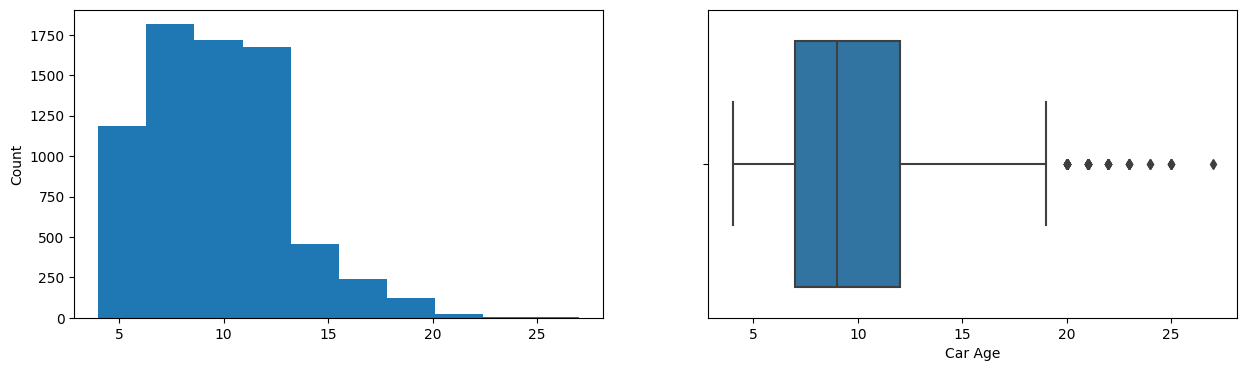

kilometers_driven_log
Skew : -1.35


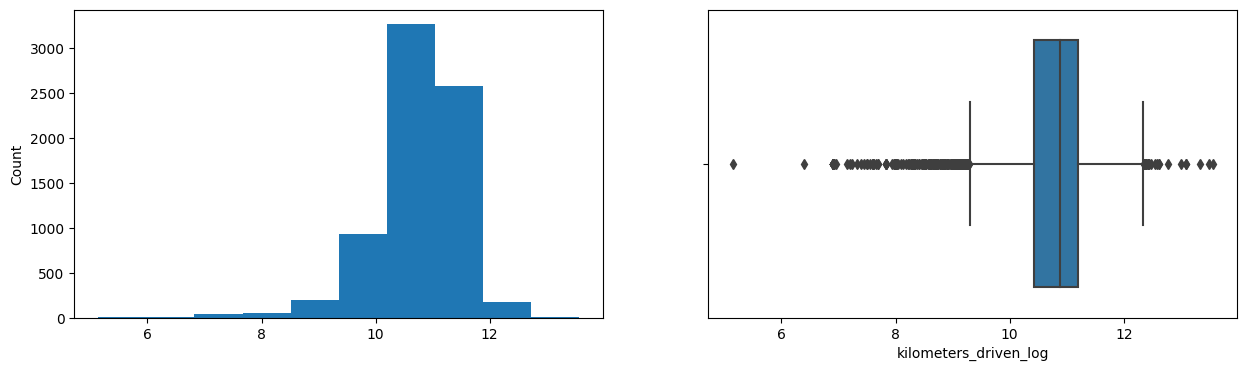

price_log
Skew : 0.42


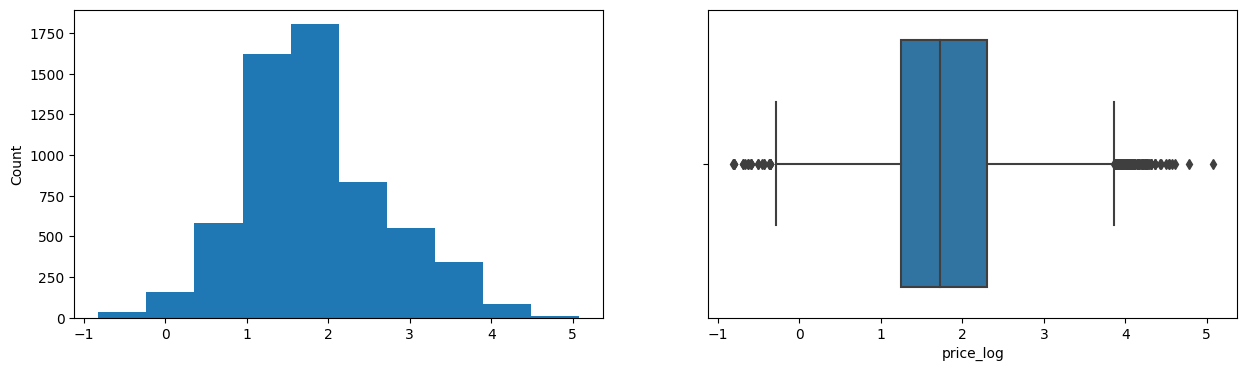

In [18]:
for col in num_cols:
  print(col)
  print('Skew :', round(data[col].skew(), 2))
  plt.figure(figsize = [15,4])
  plt.subplot(1,2,1)
  data[col].hist(grid = False)
  plt.ylabel('Count')
  plt.subplot(1,2,2)
  sns.boxplot(x = data[col])
  plt.show()

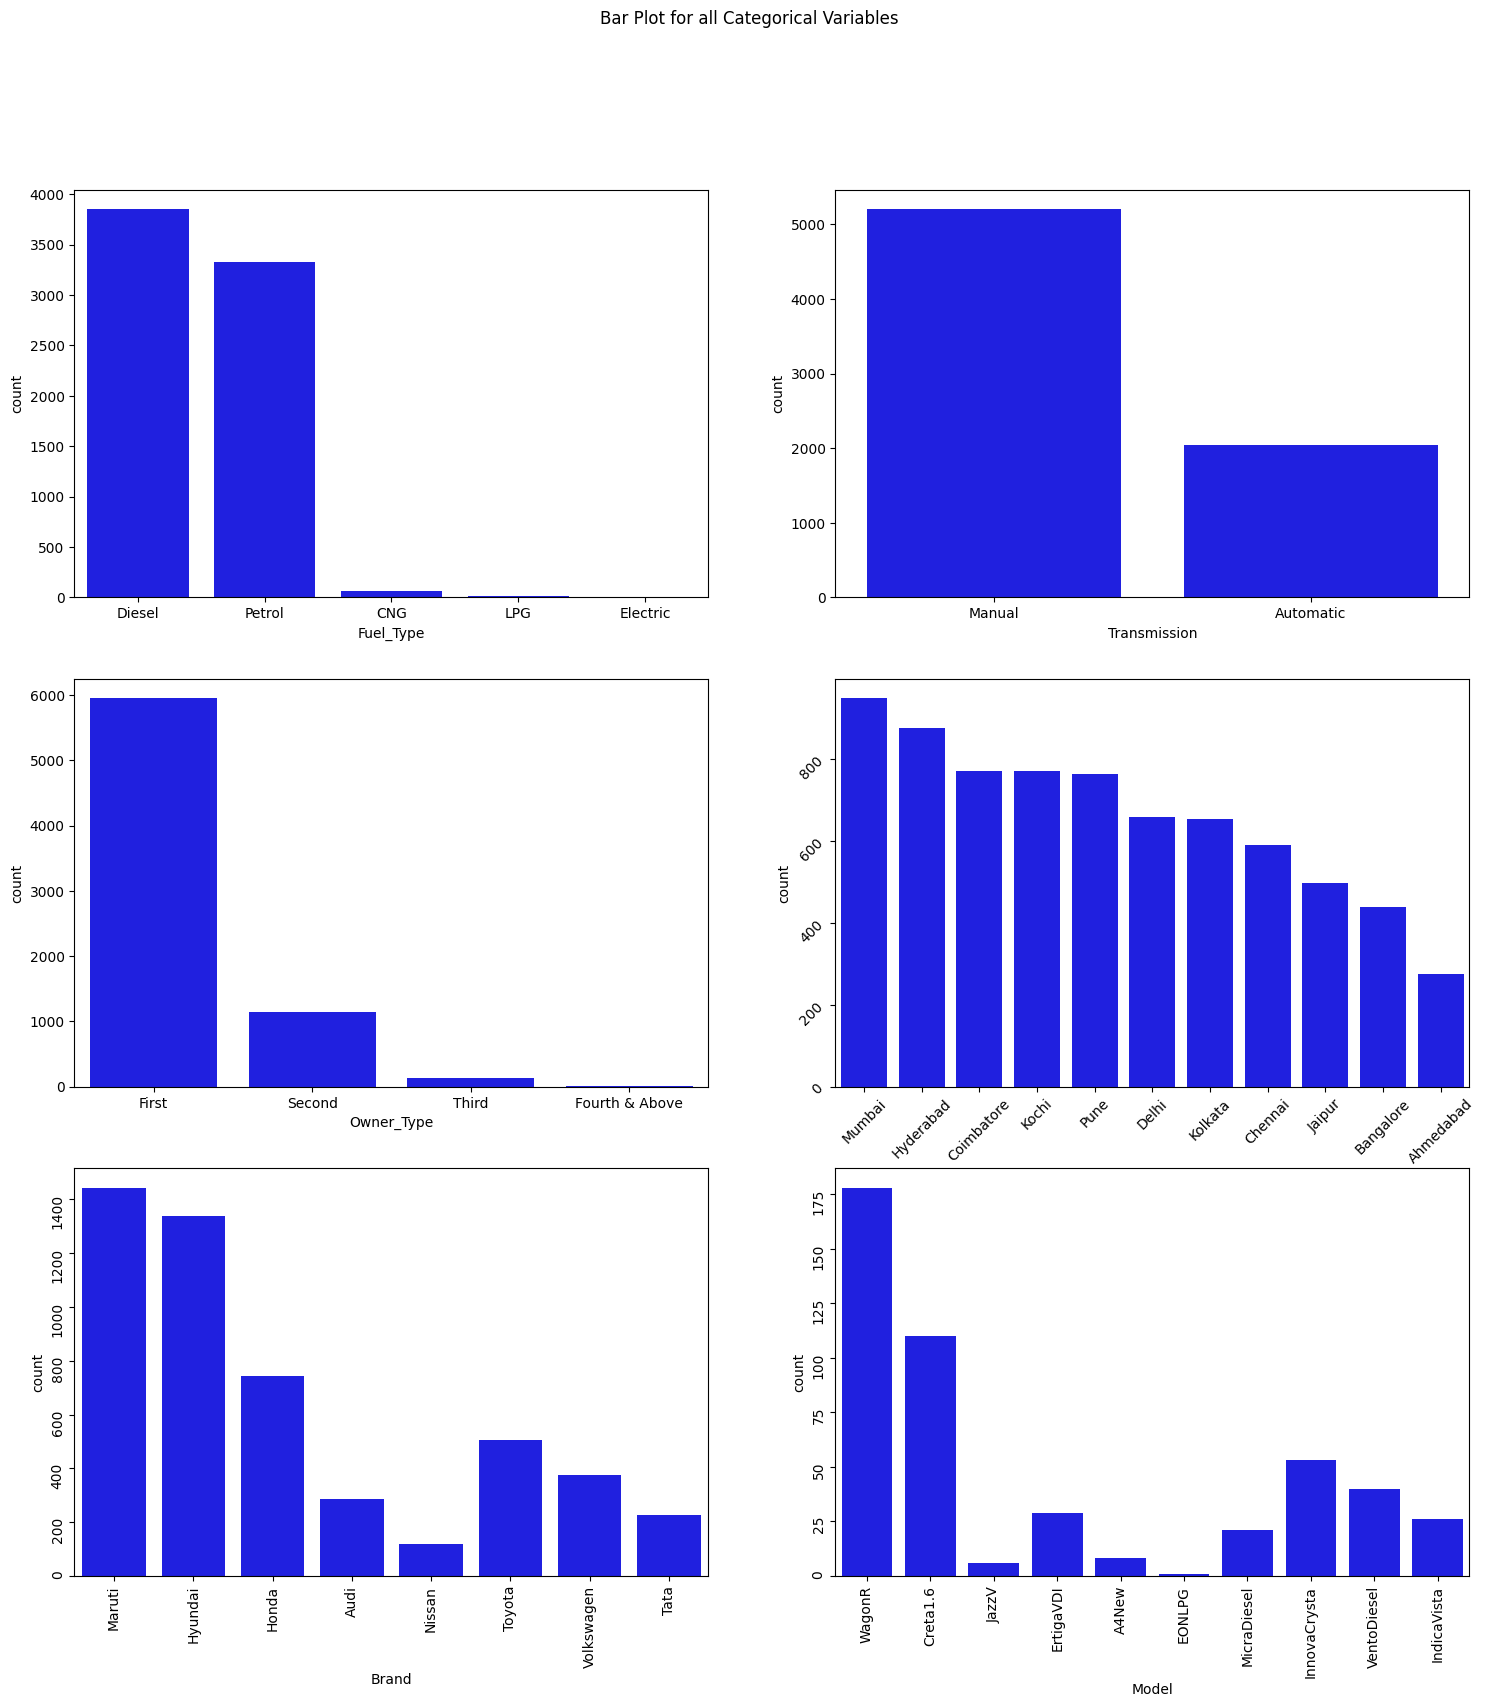

In [19]:
fig, axes = plt.subplots(3,2, figsize = [18,18])
fig.suptitle('Bar Plot for all Categorical Variables')

sns.countplot(ax = axes[0][0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);

sns.countplot(ax = axes[0][1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);

sns.countplot(ax = axes[1][0], x = 'Owner_Type', data =data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);

sns.countplot(ax = axes[1][1], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);

sns.countplot(ax = axes[2][0], x= 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(10).value_counts().index);

sns.countplot(ax = axes[2][1], x = 'Model', data = data, color = 'blue',
              order = data['Model'].head(10).value_counts().index);

axes[1][1].tick_params(labelrotation = 45);
axes[2][0].tick_params(labelrotation = 90);
axes[2][1].tick_params(labelrotation = 90)

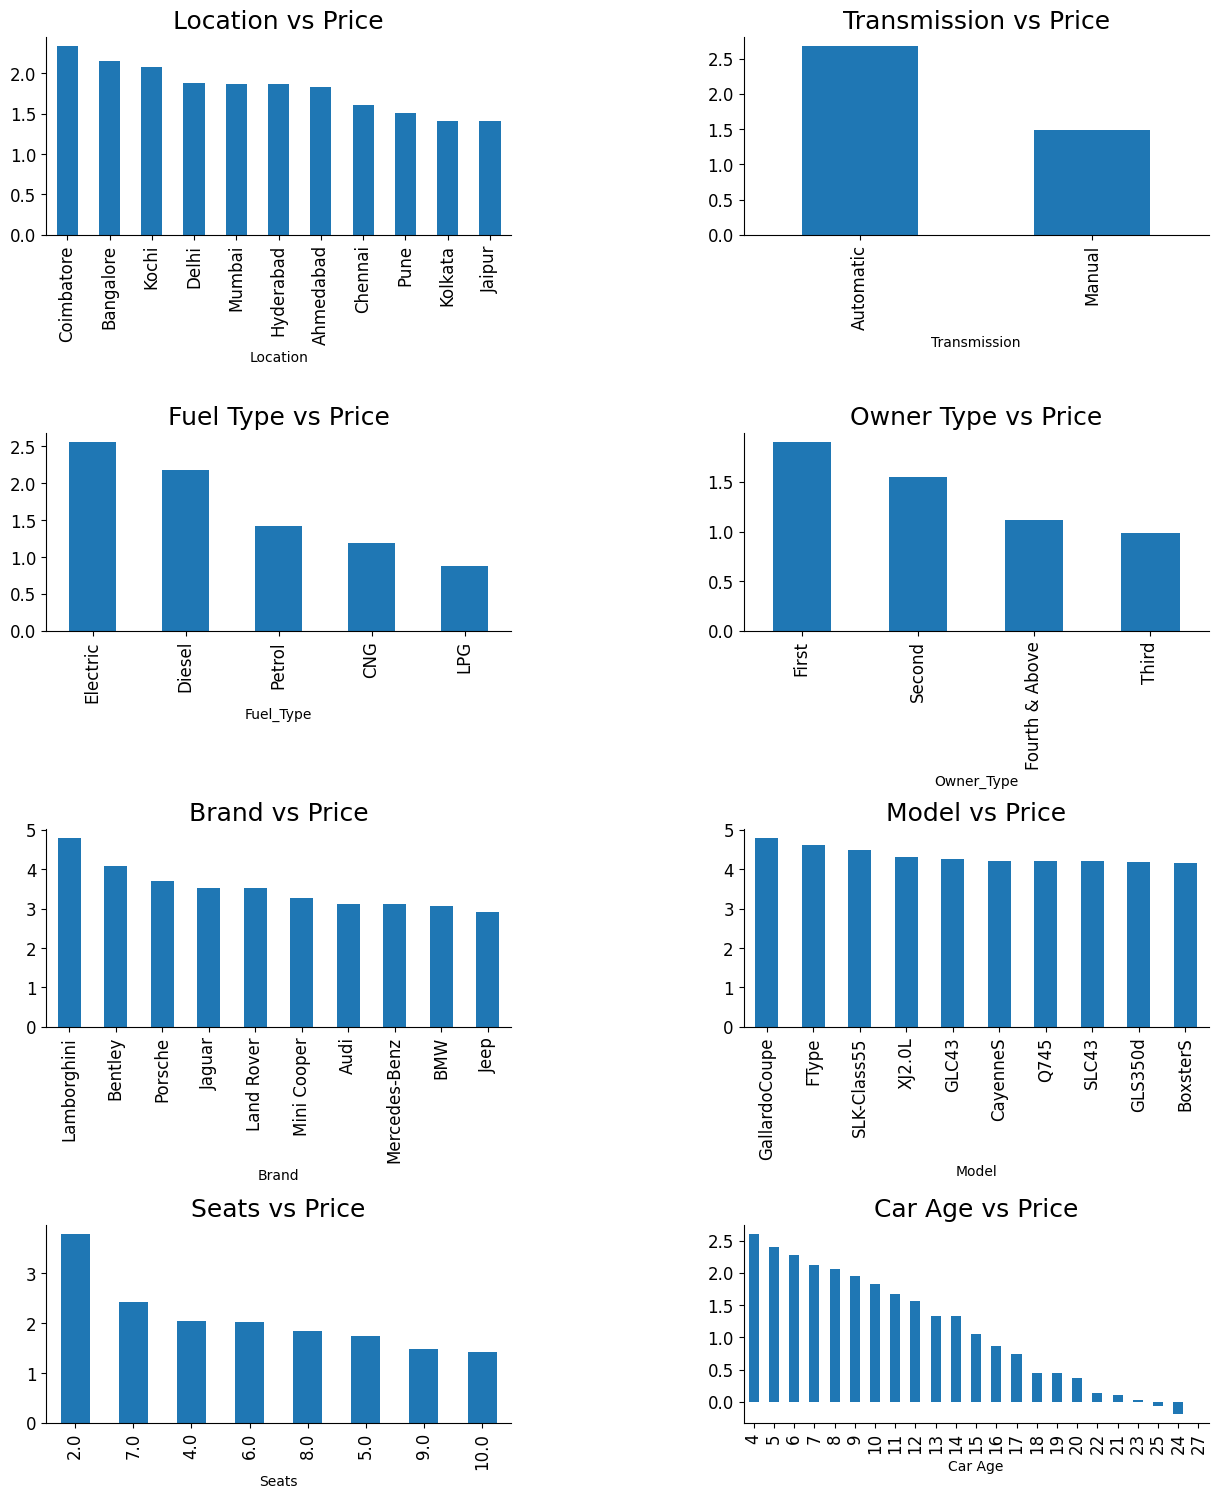

In [20]:
fig,axis = plt.subplots(4,2, figsize = [15,18])

data.groupby('Location')['price_log'].mean().sort_values(ascending = False).plot.bar(ax = axis[0][0], fontsize = 12)
axis[0][0].set_title('Location vs Price', fontsize = 18)

data.groupby('Transmission')['price_log'].mean().sort_values(ascending = False).plot.bar(ax = axis[0][1], fontsize = 12)
axis[0][1].set_title('Transmission vs Price', fontsize = 18)

data.groupby('Fuel_Type')['price_log'].mean().sort_values(ascending = False).plot.bar(ax = axis[1][0], fontsize = 12)
axis[1][0].set_title('Fuel Type vs Price', fontsize = 18)

data.groupby('Owner_Type')['price_log'].mean().sort_values(ascending = False).plot.bar(ax = axis[1][1], fontsize = 12)
axis[1][1].set_title('Owner Type vs Price', fontsize = 18)

data.groupby('Brand')['price_log'].mean().sort_values(ascending = False).head(10).plot.bar(ax = axis[2][0], fontsize = 12)
axis[2][0].set_title('Brand vs Price', fontsize = 18)

data.groupby('Model')['price_log'].mean().sort_values(ascending = False).head(10).plot.bar(ax = axis[2][1], fontsize = 12)
axis[2][1].set_title('Model vs Price', fontsize = 18)

data.groupby('Seats')['price_log'].mean().sort_values(ascending = False).plot.bar(ax = axis[3][0], fontsize = 12)
axis[3][0].set_title('Seats vs Price', fontsize = 18)

data.groupby('Car Age')['price_log'].mean().sort_values(ascending = False).plot.bar(ax = axis[3][1], fontsize = 12)
axis[3][1].set_title('Car Age vs Price',fontsize = 18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=0.5)
sns.despine()

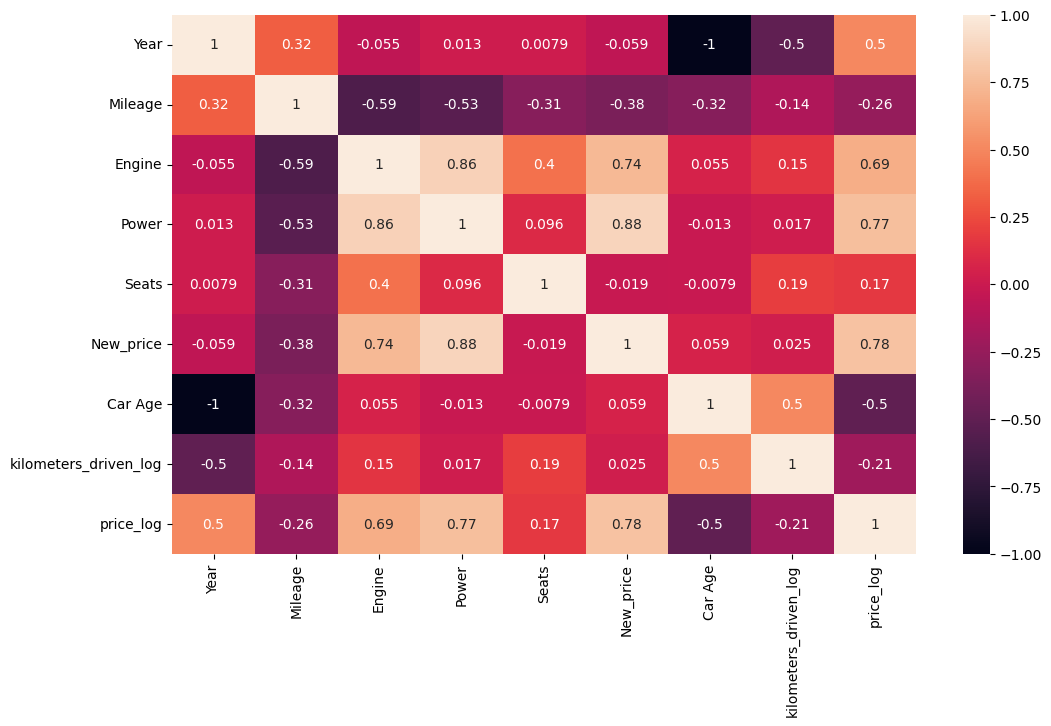

In [21]:
plt.figure(figsize = [12,7])
sns.heatmap(data.drop(['Kilometers_Driven', 'Price'], axis = 1).corr(), annot= True, vmin = -1, vmax = 1)
plt.show()

In [22]:
data.sort_values(by = ['Mileage'], ascending = True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Car Age,Brand,Model,kilometers_driven_log,price_log
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.12,16,Hyundai,SantroXing,11.156251,0.113329
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.00,999.0,NaN,5.0,NaN,2.30,17,Hyundai,SantroAT,11.218326,0.832909
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.85,21,Honda,City1.5,10.878047,0.615186
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.00,1968.0,NaN,5.0,NaN,5.45,13,Volkswagen,Jetta2007-2011,10.645925,1.695616
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.00,2179.0,115.00,5.0,NaN,NaN,12,Land Rover,RoverFreelander,11.373663,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,5.35,3.25,9,Maruti,WagonR,11.220740,1.178655
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,3.05,10,Maruti,WagonR,10.896739,1.115142
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,3.90,9,Maruti,WagonR,10.281992,1.360977
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.00,5.0,13.58,13.00,7,Mahindra,EVerito,10.819778,2.564949


In [23]:
data['Mileage'].replace(0, np.nan, inplace = True)

In [24]:
data.Mileage.isnull().sum()

83

In [25]:
data['Mileage'].fillna(data['Mileage'].astype('float64').median(), inplace = True)

In [26]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
Car Age                     0
Brand                       0
Model                       1
kilometers_driven_log       0
price_log                1234
dtype: int64

In [27]:
data['Seats'] = data.groupby(['Brand','Model'])['Seats'].apply(lambda x: x.fillna(x.astype('float64').median()))
data['Engine'] = data.groupby(['Brand','Model'])['Engine'].apply(lambda x: x.fillna(x.astype('float64').median()))
data['Power'] = data.groupby(['Brand', 'Model'])['Power'].apply(lambda x: x.fillna(x.astype('float64').median()))

In [28]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     19
Power                      64
Seats                      23
New_price                6246
Price                    1234
Car Age                     0
Brand                       0
Model                       1
kilometers_driven_log       0
price_log                1234
dtype: int64

In [29]:
data['Engine'].fillna(data['Engine'].astype('float64').median(), inplace = True)
data['Power'].fillna(data['Power'].astype('float64').median(), inplace = True)
data['Seats'].fillna(data['Seats'].astype('float64').median(),inplace = True)

In [30]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
Car Age                     0
Brand                       0
Model                       1
kilometers_driven_log       0
price_log                1234
dtype: int64

In [34]:
data['New_price'] = data.groupby(['Brand','Model'])['New_price'].apply(lambda x: x.fillna(x.astype('float64').median()))
data.New_price.isnull().sum()

4578

In [35]:
data['New_price'].replace(np.nan, 0, inplace = True)
data.New_price.isnull().sum()

0

In [36]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
Car Age                     0
Brand                       0
Model                       1
kilometers_driven_log       0
price_log                1234
dtype: int64

In [37]:
data2 = data.copy()
data2.dropna(axis = 0, inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   6018 non-null   object 
 1   Location               6018 non-null   object 
 2   Year                   6018 non-null   int64  
 3   Kilometers_Driven      6018 non-null   int64  
 4   Fuel_Type              6018 non-null   object 
 5   Transmission           6018 non-null   object 
 6   Owner_Type             6018 non-null   object 
 7   Mileage                6018 non-null   float64
 8   Engine                 6018 non-null   float64
 9   Power                  6018 non-null   float64
 10  Seats                  6018 non-null   float64
 11  New_price              6018 non-null   float64
 12  Price                  6018 non-null   float64
 13  Car Age                6018 non-null   int64  
 14  Brand                  6018 non-null   object 
 15  Mode

In [38]:
X = data2.drop(['Name','Price', 'price_log', 'Kilometers_Driven'], axis = 1)
y = data2[['Price', 'price_log']]

In [39]:
X = pd.get_dummies(X, drop_first = True)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape)

(4212, 743) (1806, 743)


In [41]:
from sklearn import metrics

def get_model_score(model, flag = True):

  score_list = []

  pred_train = model.predict(X_train)
  pred_train_ = np.exp(pred_train)

  pred_test = model.predict(X_test)
  pred_test_ = np.exp(pred_test)

  train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

  test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

  train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_ , squared = False)
  test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_ , squared = False)

  score_list.extend((train_r2, test_r2, train_rmse, test_rmse))



  if flag == True:

    print('R-Square on Training Set : ', metrics.r2_score(y_train['Price'], pred_train_))
    print('R-Square on Test Set : ', metrics.r2_score(y_test['Price'], pred_test_))
    print('RMSE on Training Set : ', np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
    print("RMSE on Test Set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    

    

  return score_list

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train['price_log'])

LinearRegression()

In [43]:
LR_Score = get_model_score(lr)

R-Square on Training Set :  0.9635601514917447
R-Square on Test Set :  0.7907984021136834
RMSE on Training Set :  2.105399086123508
RMSE on Test Set :  5.247878958376054


In [44]:
import statsmodels.api as sm

x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)

def build_ols_model(train):

  olsmodel = sm.OLS(y_train["price_log"], train)
  
  return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:20:05   Log-Likelihood:                 2205.3
No. Observations:                4212   AIC:                            -3129.
Df Residuals:                    3571   BIC:                             938.9
Df Model:                         640                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [45]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues


In [46]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Model_Vento2013-2015,-0.175807,4.980852e-02
Model_LancerGLXD,0.282903,4.903095e-02
Model_CiazVDi,0.330582,4.765786e-02
Model_CityV,0.090261,4.610275e-02
Model_A43.0,-0.221791,4.600201e-02
...,...,...
Brand_Audi,0.671853,7.365047e-129
Year,0.001810,4.660837e-167
Brand_Tata,-0.963379,1.921866e-219
Car Age,-0.098706,0.000000e+00


In [47]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Location', 'Fuel_Type', 'Brand', 'Power', 'New_price', 'Owner_Type', 'Transmission', 'kilometers_driven_log', 'Year', 'Car Age']


In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state = 0)
ridge.fit(X_train, y_train['price_log'])
Ridge_score = get_model_score(ridge)

R-Square on Training Set :  0.9495572747286988
R-Square on Test Set :  0.8601046528746668
RMSE on Training Set :  2.477110725660736
RMSE on Test Set :  4.291439022581265


In [49]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state = 0)

dtree.fit(X_train, y_train['price_log'])

dtree_score = get_model_score(dtree)

R-Square on Training Set :  0.9999986952832186
R-Square on Test Set :  0.8640516045154492
RMSE on Training Set :  0.012598077417990903
RMSE on Test Set :  4.230467412244848


In [50]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                     Imp
Power           0.602840
Year            0.146376
Car Age         0.084234
Engine          0.044863
New_price       0.036463
...                  ...
Model_GONXT     0.000000
Model_GLS350d   0.000000
Model_GLE350d   0.000000
Model_GLC43     0.000000
Model_redi-GOT  0.000000

[743 rows x 1 columns]


In [51]:
from sklearn.ensemble import RandomForestRegressor

rtree = RandomForestRegressor(random_state =0)

rtree.fit(X_train, y_train['price_log'])

rtree_score = get_model_score(rtree)

R-Square on Training Set :  0.9788327282696113
R-Square on Test Set :  0.9067297213121613
RMSE on Training Set :  1.6046436106425566
RMSE on Test Set :  3.5040714094394088


In [52]:
print(pd.DataFrame(rtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                        Imp
Power              0.609761
Year               0.123015
Car Age            0.108198
Engine             0.035667
New_price          0.030164
...                     ...
Model_RapidUltima  0.000000
Model_TT2.0        0.000000
Model_Etios1.4     0.000000
Model_EtiosPetrol  0.000000
Model_TharCRDe     0.000000

[743 rows x 1 columns]


In [58]:
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 0)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {"max_depth" : [1,3,5,7,9,11,12],
              "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
              "max_leaf_nodes":[10,20,30,40,50,60,70,80,90] }

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(estimator = dtree_tuned, param_grid = parameters, scoring = 'neg_mean_squared_error',cv = 5, verbose = 3)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_


Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV 1/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1;, score=-0.407 total time=   0.1s
[CV 2/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1;, score=-0.393 total time=   0.1s
[CV 3/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1;, score=-0.432 total time=   0.1s
[CV 4/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1;, score=-0.417 total time=   0.1s
[CV 5/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1;, score=-0.396 total time=   0.1s
[CV 1/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2;, score=-0.407 total time=   0.1s
[CV 2/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2;, score=-0.393 total time=   0.1s
[CV 3/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2;, score=-0.432 total time=   0.1s
[CV 4/5] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2;, score=-0.417 total time=   0.1s
[CV 5/5] END max_depth=1, max_leaf_nodes=10, min_sampl

In [59]:
# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=9, max_leaf_nodes=90, min_samples_leaf=10,
                      random_state=0)

In [60]:
dtree_tuned_score = get_model_score(dtree_tuned)

R-Square on Training Set :  0.8588985276204574
R-Square on Test Set :  0.8553843442428556
RMSE on Training Set :  4.14297126854891
RMSE on Test Set :  4.363238638273109


In [61]:
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                       Imp
Power             0.651987
Year              0.156322
Car Age           0.086908
Engine            0.040204
New_price         0.034930
...                    ...
Model_EecoCNG     0.000000
Model_EecoSmiles  0.000000
Model_Elantra1.6  0.000000
Model_Elantra2.0  0.000000
Model_redi-GOT    0.000000

[743 rows x 1 columns]


In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Choose the type of estimator 
rtree_tuned = RandomForestRegressor()
max_depth = [int(x) for x in np.linspace(10,120, num = 12)]
bootstrap = [True, False]
# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': max_depth,
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[1,3,4],
              'min_samples_split':[2,6,10],
              'n_estimators':[25,50,75,100],
              'bootstrap': bootstrap}

# Type of scoring used to compare parameter combinations

# Run the grid search
rf_random = RandomizedSearchCV(estimator = rtree_tuned, param_distributions= parameters,n_iter = 100,cv = 5, verbose = 2,random_state = 42 ,n_jobs = -1)
rf_random = rf_random.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rtree_tuned = rf_random.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [73]:
rtree_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt')

In [74]:
rtree_tuned_score = get_model_score(rtree_tuned)

R-Square on Training Set :  0.9999982594430409
R-Square on Test Set :  0.8740633641499658
RMSE on Training Set :  0.01455091382419621
RMSE on Test Set :  4.071714839124998


In [75]:
print(pd.DataFrame(rtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Power                0.149718
Engine               0.119205
Transmission_Manual  0.075466
Car Age              0.070308
Year                 0.070023
...                       ...
Model_BoleromHAWK    0.000000
Model_ScorpioSLX     0.000000
Model_PlatinumEtios  0.000000
Model_EVerito        0.000000
Model_Etios1.4       0.000000

[743 rows x 1 columns]


In [76]:
# Defining list of models you have trained
models = [lr, ridge, dtree, rtree, dtree_tuned, rtree_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [77]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge','Decision Tree', 'Random Forest', 'Tuned Decision Tree', 'Tuned Random Forest'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.963560,0.790798,2.105399,5.247879
1,Ridge,0.949557,0.860105,2.477111,4.291439
2,Decision Tree,0.999999,0.864052,0.012598,4.230467
3,Random Forest,0.978833,0.906730,1.604644,3.504071
4,Tuned Decision Tree,0.858899,0.855384,4.142971,4.363239
5,Tuned Random Forest,0.999998,0.874063,0.014551,4.071715
